# Understanding Obesity in the United States
Although it is important to respect one another and treat people with kindness, it is understood in today's society that obesity is on the rise and that this is a problem. Obesity can increase ones risk of stroke, diabetes, and cancer ([WHO](https://www.who.int/news-room/questions-and-answers/item/obesity-health-consequences-of-being-overweight#:~:text=Carrying%20extra%20fat%20leads%20to,premature%20death%20and%20substantial%20disability.)).
In this article, I am going to show you the state of the so called obesity epidemic, and show you how I came to these inclusions. Hopefully you will learn something about data science, as well as the magnitude of the obesity epidemic. 

By following along with this tutorial, you will learn data cleaning, data framing, simple machine learning algorithims, as well as some data visualization. In order to get the most from this it would be best to have some knowledge of python.

Foremost, some techno mumbo jumbo. You can download and run this jupyter notebook, or copy the Python code into your own IDE (Like PyCharm or VS Code). You are going to want to have numpy, pandas, and matplotlib installed. 

First, we are going to need our dataset! The dataset we are using can be downloaded from [here](https://catalog.data.gov/dataset/nutrition-physical-activity-and-obesity-behavioral-risk-factor-surveillance-system). Make sure to download the CSV version! 
One of the first things you should do is open your dataset in a spreadsheet. This lets you look at the data you are working with, and visual inspection helps you see things that are hard to determine with code alone. Upon inspecting this data set (in Excel, Google Sheets, as a raw csv, etc.) you might notice there are lots of columns and lots of questions. We are going to need to subset our data in order to draw individual conclusions. 

Let's import our dataset into Python. Make sure the csv is inside whatever directory you are working in. If you download my [GitHub repo](https://github.com/aclarke500/obesity-analysis/tree/main/plots) it will be there.
We will use Pandas to hold our dataframe, and we will print out the column names to ensure we have imported it correctly.



In [60]:
import pandas as pd
# import our csv
master_df = pd.read_csv('Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')
print(master_df.columns) # print out data frame columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')


After either inspecting the column names or looking at this data in a spreadsheet, we notice that this survey asks different questions. In order to find out what data we can extract, let's pull out all the questions they ask. We can do this by finding every **unique** value in the questions column. 

In [61]:
all_questions = master_df['Question'].unique().tolist() # get all unique entries as a list
for question in all_questions: # for loop done to print values on own line
    print(question)

Percent of adults who engage in no leisure-time physical activity
Percent of adults aged 18 years and older who have obesity
Percent of adults aged 18 years and older who have an overweight classification
Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)
Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week
Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)
Percent of adults who engage in muscle-strengthening activities on 2 or more days a week
Percent of adults who report consuming fruit less than one time d

Since this whole dataset contains multiple responses to questions, let's filter the data to include **only** the question of whether or not an adult is obese:

In [62]:
obese_adults = master_df[master_df['Question'] == 'Percent of adults aged 18 years and older who have obesity']

Let's break down that line of code, since there is a bit to unpack with it. The `obese_adults =` is just an assignment to the result of whatever is on the right side of the `=`. The expression wedged in between `master_df[]` is `master_df['Question'] == 'Percent of adults aged 18 years and older who have obesity'`. This returns what is known as a **Logical Array**, where every value is True or False based on our expression. We can verify this by printing out the values in the question column and our 'Logical Array'.

In [63]:
first_5_questions = master_df['Question'].head(5) # get first 5 questions
for q in first_5_questions: # print them out on own line
    print(q)
# print first 5 entries of our logical array
print((master_df['Question'] == 'Percent of adults aged 18 years and older who have obesity').head(5)) 

Percent of adults who engage in no leisure-time physical activity
Percent of adults aged 18 years and older who have obesity
Percent of adults aged 18 years and older who have obesity
Percent of adults aged 18 years and older who have an overweight classification
Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)
0    False
1     True
2     True
3    False
4    False
Name: Question, dtype: bool


We can see that the indices marked by **True** are the same ones that ask about obesity. So the value being assigned to `obese_adults` is the rows where our expression is true. In other words, we are only getting the rows that ask about obesity. Now we are going to build a new, **clean** data frame. In this data set, there are some empty values. This will cause issues later on, so we want to build a data frame with complete data. Further, we only need some of the columns from this data set. Let's create a new data frame with the year, location (state), and the percent_obese (the entrie in the data_value) column. We are going to check every row to make sure the entry is not empty, which in this data set, is denoted by an empty value and a '~' in the footnotes. 

In [64]:
cleaned_obese_adults_dict = { # create dictionary to hold data
    'year':[],
    'location':[],
    'percent_obese':[],
}

for index, row in obese_adults.iterrows(): # append data to dictionary
	if row['Data_Value_Footnote_Symbol'] != '~':
		cleaned_obese_adults_dict['year'].append(row['YearStart'])
		cleaned_obese_adults_dict['location'].append(row['LocationDesc'])
		cleaned_obese_adults_dict['percent_obese'].append(row['Data_Value'])

cleaned_obese_adults_df = pd.DataFrame(cleaned_obese_adults_dict) # make data frame from dictionary

Now, let's make some plots. Data visualization is important to convince people of your claims and to communicate effictively. Since there are a lot of locations included in this survey, we are going to want to do this in a **dynamic** way. What I mean by this is instead of writing code to plot each of the 50 states one by one, we will write a script that plots a state and gives return us some statistis. We will write another script that will loop and call the first script.
## Extract, Plot, and Save Data


In [65]:
import matplotlib.pyplot as plt
import numpy as np
# passing in our data frame since local scope is best practice
def plot_by_location(location, df, is_loop): 
    # logical array to get only this locations data
    locations_df = df[df['location'] == location]
    # get all years (will be x value for plot)
    years = locations_df['year'].unique().tolist() 
    # sort the years. sort method modifies the original list so no need to reassign
    years.sort()
    # a list we will build up of all obese people currently for each year in the location
    percent_obese = []
    for year in years:
        year_df = locations_df[locations_df['year'] == year] # another logical array!
        # add all surveys results from the year and location to a list
        percent_obese_list = year_df['percent_obese'].tolist()
        # get the average of that list
        avg = sum(percent_obese_list)/len(percent_obese_list)
        # append that to our list
        percent_obese.append(avg)
    # now for some machine learning!
    # make a numpy array so we can get a line of best fit
    x_values = np.array(years)
    y_values = np.array(percent_obese)
    
    # get a trendline for our data, remember y =mx + b? and they said math was useless...
    slope, intercept = np.polyfit(x_values, y_values, 1) 
    line_of_best_fit = slope * x_values + intercept # make a list for our trendlines prediction at each year
    # make a string we can display on our graphs
    equation_string =  'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
    
    # plotting time
    plt.scatter(years, percent_obese, c='red') # this plots each point against one another as a dot 
    # plot our predicted values from our trend line across as a smooth line
    plt.plot(x_values, line_of_best_fit, label='line of best fit' +'\n' + equation_string)
    # add legend, labels, and title
    plt.legend() # add a legend
    plt.xlabel('Year')
    plt.ylabel('Percentage of Obese Adults')
    plt.title('Percentage of Obese Adults in ' + location + ' Over Time')
    if not is_loop: # return if we are not looping over to write plots 
        return
    plt.savefig(f'./plots/obesity_in_{location}.png') # save plot in a directory (folder) called plots
    plt.clf() # clears the figure, important to do if plotting multiple things
    
    results = {
        'current_obese': percent_obese[len(percent_obese)-1], # get last entry
        'location': location,
        'increase_per_year':slope
    }
    return results

That was a hefty function, but we can break down the logic into a few parts. First, we restructure our data. 

`   # logical array to get only this locations data
    locations_df = df[df['location'] == location]
    # get all years (will be x value for plot)
    years = locations_df['year'].unique().tolist() 
    # sort the years. sort method modifies the original list so no need to reassign
    years.sort()
`
The first three lines of code make a data frame with only the obese surveys from the specified location, and sort the years present.
`
	#a list we will build up of all obese people currently for each year in the location
    percent_obese = []
    for year in years:
        year_df = locations_df[locations_df['year'] == year] # another logical array!
        # add all surveys results from the year and location to a list
        percent_obese_list = year_df['percent_obese'].tolist()
        # get the average of that list
        avg = sum(percent_obese_list)/len(percent_obese_list)
        # append that to our list
        percent_obese.append(avg)`
        
Here, we take all the surveys and get the average from all the surveys of that year. We use that as a metric for the number of obese people in that location.

`   # now for some machine learning!
    # make a numpy array so we can get a line of best fit
    x_values = np.array(years)
    y_values = np.array(percent_obese)    
    # get a trendline for our data, remember y =mx + b? and they said math was useless...
    slope, intercept = np.polyfit(x_values, y_values, 1) 
    line_of_best_fit = slope * x + intercept # make a list for our trendlines prediction at each year
    # make a string we can display on our graphs
    equation_string =  'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept), 2)
    `

In this chunk, we are getting a trendline that best represents the data. Although this may seem like grade 9 math, (and in some ways it is) this is technically machine learning at its simplest. You're creating a regression line that predicts the percentage of obese people in a state, given a **model**. Look at you, following along, doing ML and AI work! 
`   #plotting time
    plt.scatter(years, percent_obese, c='red') # this plots each point against one another as a dot 
    # plot our predicted values from our trend line across as a smooth line
    plt.plot(x_values, line_of_best_fit, label='line of best fit' +'\n' + equation_string)
    # add legend, labels, and title
    plt.legend() # add a legend
    plt.xlabel('Year')
    plt.ylabel('Percentage of Obese Adults')
    plt.title('Percentage of Obese Adults in ' + location + 'Over Time')
    if not is_loop: # return if we are not looping over to write plots 
        return
    plt.savefig(f'./plots/obesity_in_{location}.png') # save plot in a directory (folder) called plots
    plt.clf() # clears the figure, important to do if plotting multiple things`
   
Here we are just plotting the data. We use a scatter plot for the actual entries, and a smooth line for our trendline. They are both just 2 lists of x and y values, but they way they are shown differs depending on the `.scatter` or `.plot` method. If we are looping over the locations, we want to save and clear the figure. If we are just trying to display one location, we don't need to bother (as we will do later).


`results = {
        'current_obese': percent_obese(len(percent_obese)-1), # get last entry
        'location': location,
        'increase_per_year':slope
    }
    return results`

This last piece just makes a dictionary called `results` and binds some data to it. Then we return that so we can analyze the results.

    

Now that we have that function written, let's try and plot some data using it! First, let's look at the national state of obesity over time.

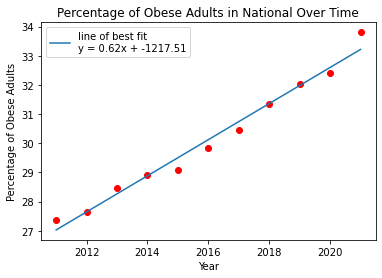

In [66]:
plot_by_location('National', cleaned_obese_adults_df, False)

We can see from this plot that obesity IS increasing over time, and follows our trendline pretty closely. If you are from the United States, or have a favourite state, try and use this method to see how your state is progressing with respect to obesity. 
Now, let's iterate over all the locations (most but not all are states) to see how this varies between locations.

In [67]:
locations = cleaned_obese_adults_df['location'].unique().tolist() # get list of all locations

results_dict = { # dictionary to hold our data
    'location': [],
    'percent_obese': [],
    'increase_per_year': [],
    'index': [] # this makes it easier to iterate over our dictionary later
}
i = 0 # counter for index
for location in locations:
    result = plot_by_location(location, cleaned_obese_adults_df, True)
    results_dict['location'].append(location)
    results_dict['percent_obese'].append(result['current_obese'])
    results_dict['increase_per_year'].append(result['increase_per_year'])
    results_dict['index'].append(i)
    i+=1

<Figure size 432x288 with 0 Axes>

Awesome, now we have all our plots. (Check your plots directory!!)
But, which location has the most obese people in it (as a percent)? Let's use our results dictionary to figure that out! We will use a primitive searching algorithim to determine the maximum percentage a location holds.

In [68]:
max_obese = 0 # initial placeholder
location = ''
for i in results_dict['index']:
    if results_dict['percent_obese'][i] > max_obese:
        max_obese = results_dict['percent_obese'][i]
        location = results_dict['location'][i]

print(f'The location with the highest number of obese people is {location} with {str(round(max_obese))}% of people reported as obese as of 2021.')

The location with the highest number of obese people is Kentucky with 41% of people reported as obese as of 2021.


If you enjoyed this notebook, feel free to connect with me on [LinkedIn](https://www.linkedin.com/in/adam-clarke-a5b83b207/) and follow me on [GitHub](https://github.com/aclarke500)